In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('twitter_training.csv')
data.shape

(74682, 3)

In [3]:
data.sample(10)

,PLATFORM,ANALYSIS,REVIEW
21468,CS-GO,Neutral,lost count how much i've spent on csgo crates ...
41516,Battlefield,Irrelevant,Battlefield 4 player arbadZ has been ban SEE D...
45472,Verizon,Negative,This shit got here
51241,FIFA,Negative,@ EASPORTSFIFA Please tell me how the hell I l...
33197,Fortnite,Neutral,Dusty Jordan.
50080,FIFA,Positive,Spent most hours of Quarantine playing an FIFA...
43461,PlayerUnknownsBattlegrounds(PUBG),Positive,I started to feel the way I felt after I playe...
32110,LeagueOfLegends,Negative,War of Ages Ultimate - League of Northern Lege...
34592,Fortnite,Irrelevant,"Big Dead For Deadpool. ""store.playstation.com /"
17112,PlayStation5(PS5),Neutral,. Enjoy AMAZING browser and get extra passive...


In [4]:
data.isnull().sum()

PLATFORM      0
ANALYSIS      0
REVIEW      686
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

PLATFORM    0
ANALYSIS    0
REVIEW      0
dtype: int64

In [7]:
data.sample()

,PLATFORM,ANALYSIS,REVIEW
65624,johnson&johnson,Neutral,Washington: US pharmaceutical company Johnson ...


In [8]:
data.drop(columns=['PLATFORM','ANALYSIS'], inplace=True)

In [9]:
data.sample()

,REVIEW
70105,Stunning shots.


In [10]:
from textblob import TextBlob

In [11]:
data.head()

,REVIEW
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...


In [12]:
data.shape

(73996, 1)

In [13]:
TextBlob("I am coming to the borders").sentiment.polarity

0.0

In [14]:
polarity =[]
for i in data['REVIEW']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
len(polarity)

73996

In [15]:
data['Polarity'] = polarity

In [16]:
data.sample()

,REVIEW,Polarity
12426,@NBA2K the shooting suck,0.0


In [17]:
data['Polarity'] = data['Polarity'].round()

In [18]:
print("Positive Comment : ",(data['Polarity']==1).sum())
print("Nutral Comment : ",(data['Polarity']==0).sum())
print("Nagetive Comment",(data['Polarity']==-1).sum())

Positive Comment :  7381
Nutral Comment :  63244
Nagetive Comment 3371


In [19]:
positive = data['Polarity']== 1
Nautral = data['Polarity']== 0
Nagative = data['Polarity']== -1

In [20]:
positive_comment = data[positive]
positive_comment.sample(10)

,REVIEW,Polarity
28862,If we are allowed to cancel the jump when they...,1.0
22779,Feels good today :),1.0
17771,Very Interesting Design. Also uncertain if the...,1.0
54973,"Face mask, ice-cold water and Call of Duty is ...",1.0
58032,Nice bug @Rainbow6Game pic.twitter.com/MeOpHhpA7D,1.0
55740,@CallofDuty WE NEED MORE SPEC OPS MISSIONS!!! ...,1.0
6661,"Hi, this is great!!.. I tried to crack it on t...",1.0
31365,"great stream, today. thank you all for coming ...",1.0
73256,"Asus monitor, great for games at 1080p. This m...",1.0
64071,Mahomes died lol,1.0


In [21]:
from wordcloud import WordCloud, STOPWORDS

In [22]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [23]:
data['REVIEW']

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: REVIEW, Length: 73996, dtype: object

In [24]:
type(data['REVIEW'])

pandas.core.series.Series

In [25]:
all_positive_reviews = " ".join(positive_comment['REVIEW'])
type(all_positive_reviews)

str

In [113]:
import tkinter as tk
from tkinter import simpledialog
from PIL import Image

Create a WordCloud for 70000 Words


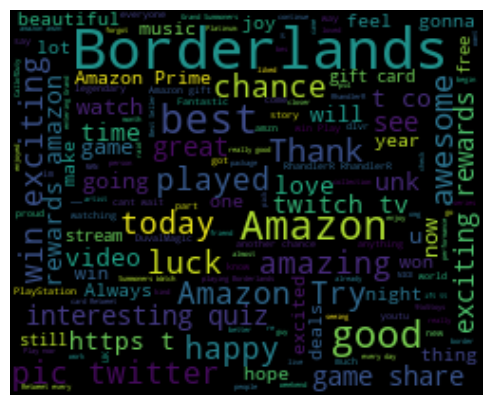

In [168]:
all_positive_reviews = " ".join(positive_comment['REVIEW'])

def user_input():
    root = tk.Tk()
    root.withdraw()  
    input_value = simpledialog.askstring("Input", "Please Enter Your Number")
    return input_value
obj = user_input()
obj = int(obj)
print(f"Create a WordCloud for {obj} Words")

image = Image.open('round.jpg')
img_arr = np.array(image)
img_arr[img_arr == 255] = 0

all_positive_reviews = " ".join(positive_comment['REVIEW'])
wordcloud = WordCloud(mask=img_arr, stopwords=STOPWORDS, background_color='black').generate(all_positive_reviews[0:obj])
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()